# Visualizing Earning Based on College Majors

The dataset is on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by <b>[American Community Survey](https://www.census.gov/programs-surveys/acs/)</b>, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their <b>[Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

In [13]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# To display multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# To display all columns of dataframe
pd.set_option('display.max_columns', None)

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')

# displaying top and bottom five rows of dataframe
recent_grads.head()
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [6]:
recent_grads[recent_grads['Men'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,2558,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


There are four columns in total with null values and also we can see that all those columns belong to single row. So if we delete rows with null values, we should be only loosing one row.

In [7]:
print('Number of rows in dataframe before dropping null values : ',recent_grads.shape[0])

Number of rows in dataframe before dropping null values :  173


In [8]:
# Dropping rows with null values
recent_grads = recent_grads.dropna()
print('Number of rows in dataframe after dropping null values : ',recent_grads.shape[0])

Number of rows in dataframe after dropping null values :  172


In [9]:
recent_grads.groupby('Major_category').sum()[['Total','Median']].sort_values(ascending=False, by='Total')

,Total,Median
Major_category,,
Business,1302376.0,566000
Humanities & Liberal Arts,713468.0,478700
Education,559129.0,517600
Engineering,537583.0,1664100
Social Science,529966.0,336100
Psychology & Social Work,481007.0,270900
Health,463230.0,441900
Biology & Life Science,453862.0,509900
Communications & Journalism,392601.0,138000


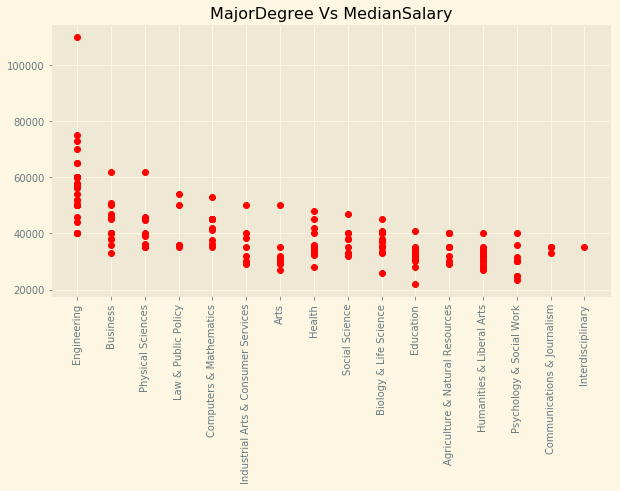

In [10]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(10,5))
plt.scatter(recent_grads['Major_category'], recent_grads['Median'],c='red')
plt.title('MajorDegree Vs MedianSalary')
plt.xticks(rotation='vertical');

As we can see that our top five most popular major category degress are Business, Humanities & Liberal Arts, Education, Engineering and Social Science with having total enrollments of 1302376, 713468, 559129, 537583 and 529966 respectively. However, the median salary is highest for Engineering and lowest for that of Education. <b>So there is no specific relationship between the popular degrees and the median salaries.

In [11]:
# Let's check visually variation of variation of men in different courses
majors_group = recent_grads.groupby('Major_category').sum().reset_index()
majors_group

,Major_category,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,Agriculture & Natural Resources,993,10421,75620.0,40357.0,35263.0,3.647407,1068,63794,55585,15470,41891,3486,0.466352,316000,222000,410100,18677,33217,7414
1,Arts,1049,48121,357130.0,134390.0,222740.0,4.829264,3260,288114,207773,114791,153111,28228,0.721382,264500,175700,349300,94785,163720,60116
2,Biology & Life Science,1335,48662,453862.0,184919.0,268943.0,8.220700,2317,302797,240377,116736,165802,22854,0.852849,509900,372600,645200,151233,127182,42742
3,Business,726,80769,1302376.0,667852.0,634524.0,6.281573,15505,1088742,988870,196936,790425,79877,0.923826,566000,435000,713000,148538,496570,126788
4,Communications & Journalism,416,7610,392601.0,131921.0,260680.0,2.633536,4508,330660,273330,89817,214228,26852,0.302151,138000,105000,179900,86556,172992,49595
5,Computers & Mathematics,627,29730,299008.0,208725.0,90283.0,3.429494,2860,237894,207545,53270,159156,18373,0.926816,470200,322200,639000,137859,74463,16136
6,Education,2086,38203,559129.0,103526.0,455603.0,11.976120,4742,479839,398059,120593,288031,24969,0.827232,517600,425450,617000,338713,121761,40870
7,Engineering,656,72207,537583.0,408307.0,129276.0,6.927772,4926,420372,381867,85136,288952,29817,1.836682,1664100,1205100,2043000,269767,102383,25079
8,Health,1158,71255,463230.0,75517.0,387713.0,9.541823,3914,372147,294819,114592,228418,22213,0.791042,441900,314000,603000,245441,110496,31270
9,Humanities & Liberal Arts,2026,60729,713468.0,272846.0,440622.0,9.476856,5340,544118,416939,214030,295561,51101,1.215114,478700,352400,631100,192650,276532,94240


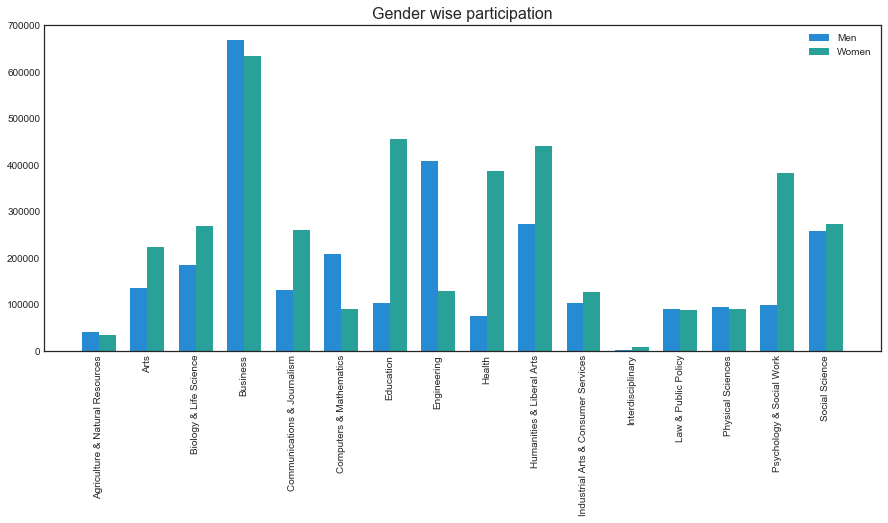

In [14]:
plt.style.use('seaborn-white')
n = np.arange(1, len(majors_group['Major_category'])+1)
fig = plt.figure(figsize=(15,6))
width=0.35
plt.bar(n, majors_group['Men'], width, label='Men')
plt.bar(n+width, majors_group['Women'], width, label='Women')
plt.xticks(n + width/2, (list(majors_group['Major_category'])), rotation='vertical')
plt.title('Gender wise participation')
plt.legend();

If we take four most popular courses which is Business, Humanities & Liberal Arts, Education, Engineering and Social Science we can see that in Business the participation of men and women is neck-to-neck with men slightly more in number than women. For Humanities & Liberal Arts, the participation of women is much more in comparision to men. In the field of Education however the number of women surpasses men to a large extent. However Engineering courses see more men than women.<br><br>
<b>Overall below are the courses in which women opt for more in comparision to men.</b>
* Arts
* Biology & Life Science
* Communications & Journalism
* Education
* Health
* Humanities & Liberal Arts
* Industrial Arts & Consumer Services
* Psychology & Social Work
* Social Science

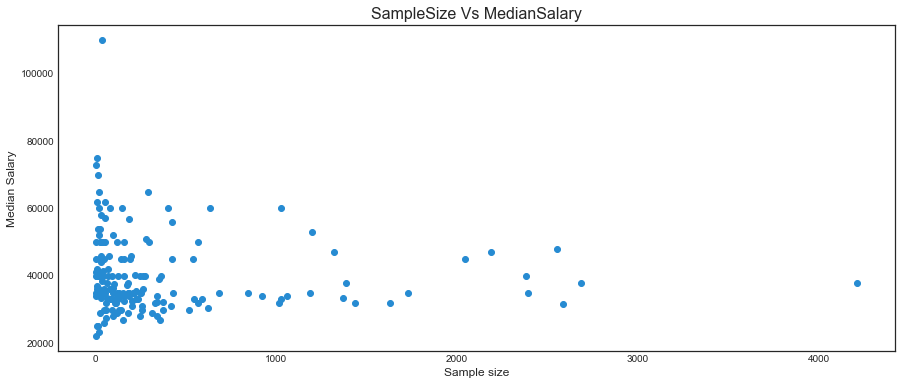

In [21]:
fig = plt.figure(figsize=(15,6))
plt.scatter(recent_grads['Sample_size'], recent_grads['Median'])
plt.xlabel('Sample size')
plt.ylabel('Median Salary')
plt.title('SampleSize Vs MedianSalary');

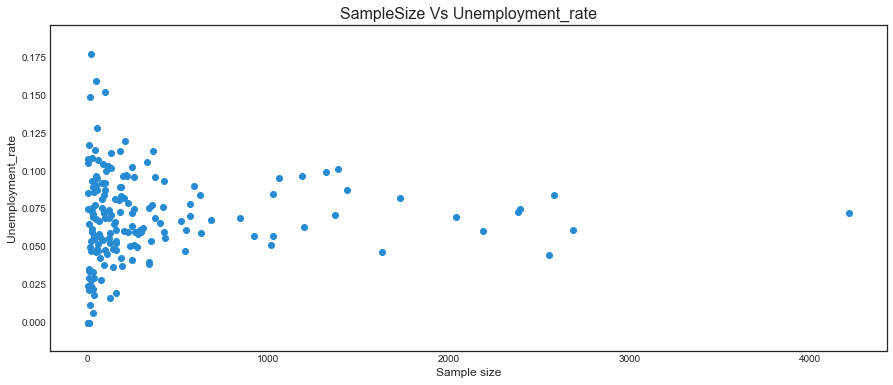

In [22]:
fig = plt.figure(figsize=(15,6))
plt.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
plt.xlabel('Sample size')
plt.ylabel('Unemployment_rate')
plt.title('SampleSize Vs Unemployment_rate');

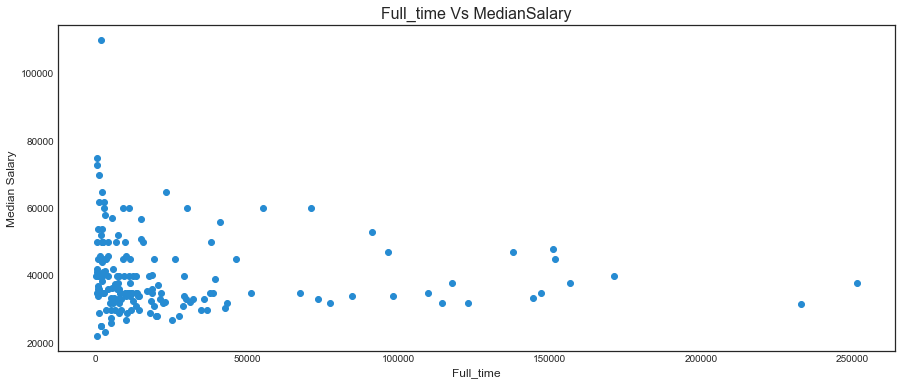

In [23]:
fig = plt.figure(figsize=(15,6))
plt.scatter(recent_grads['Full_time'], recent_grads['Median'])
plt.xlabel('Full_time')
plt.ylabel('Median Salary')
plt.title('Full_time Vs MedianSalary');

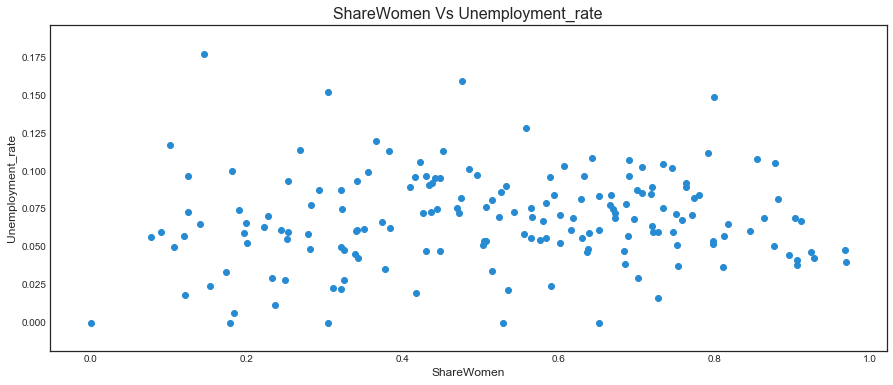

In [27]:
fig = plt.figure(figsize=(15,6))
plt.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
plt.xlabel('ShareWomen')
plt.ylabel('Unemployment_rate')
plt.title('ShareWomen Vs Unemployment_rate');

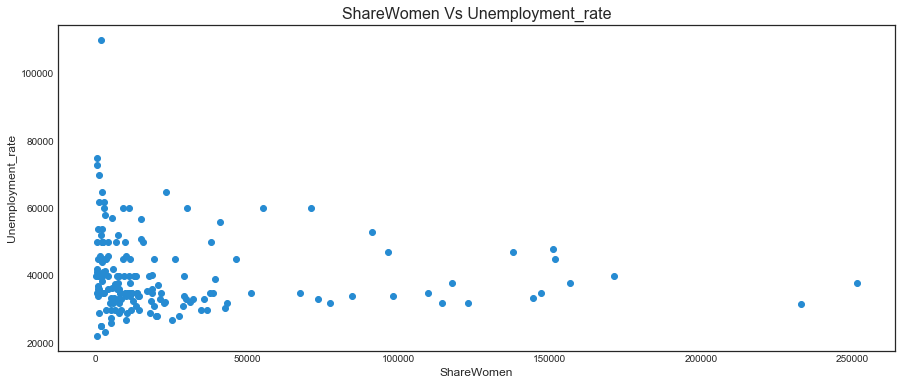

In [28]:
fig = plt.figure(figsize=(15,6))
plt.scatter(recent_grads['Full_time'], recent_grads['Median'])
plt.xlabel('ShareWomen')
plt.ylabel('Unemployment_rate')
plt.title('ShareWomen Vs Unemployment_rate');

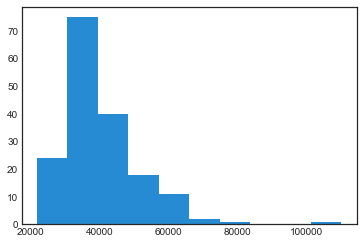

In [31]:
plt.hist(recent_grads['Median']);

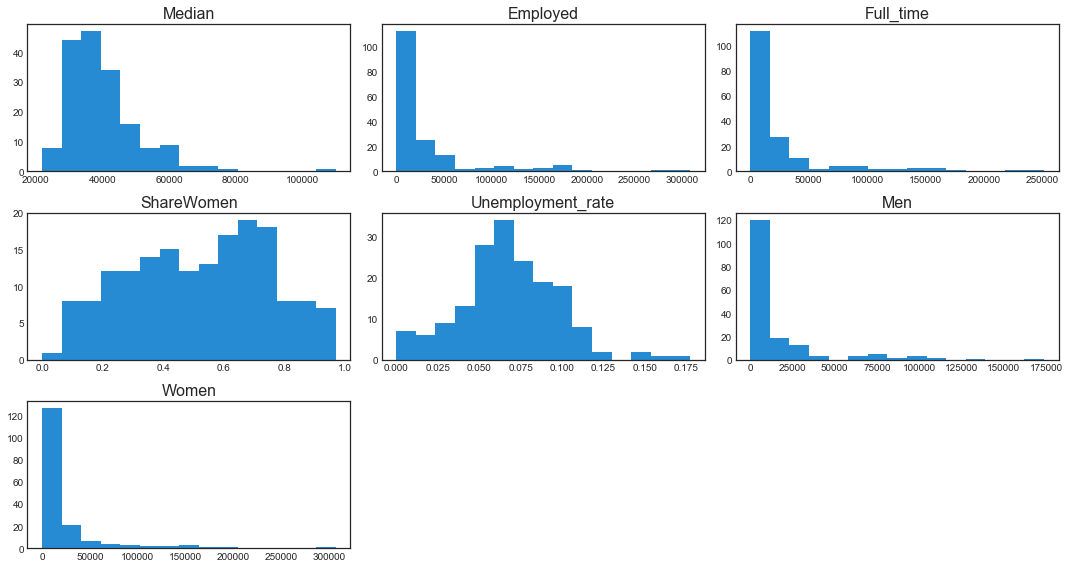

In [66]:
hist = ['Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize=(15,8))
for i in range(0,7):
    fig.add_subplot(3,3,i+1)
    plt.hist(recent_grads[hist[i]], bins=15)
    plt.title(hist[i])
plt.tight_layout();

<b>Above seven plots shows distribution of values in different columns.

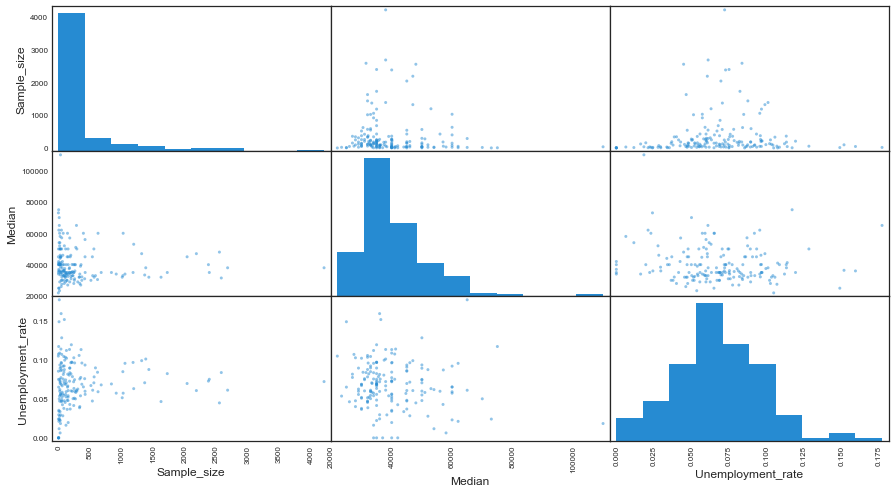

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(15,8));

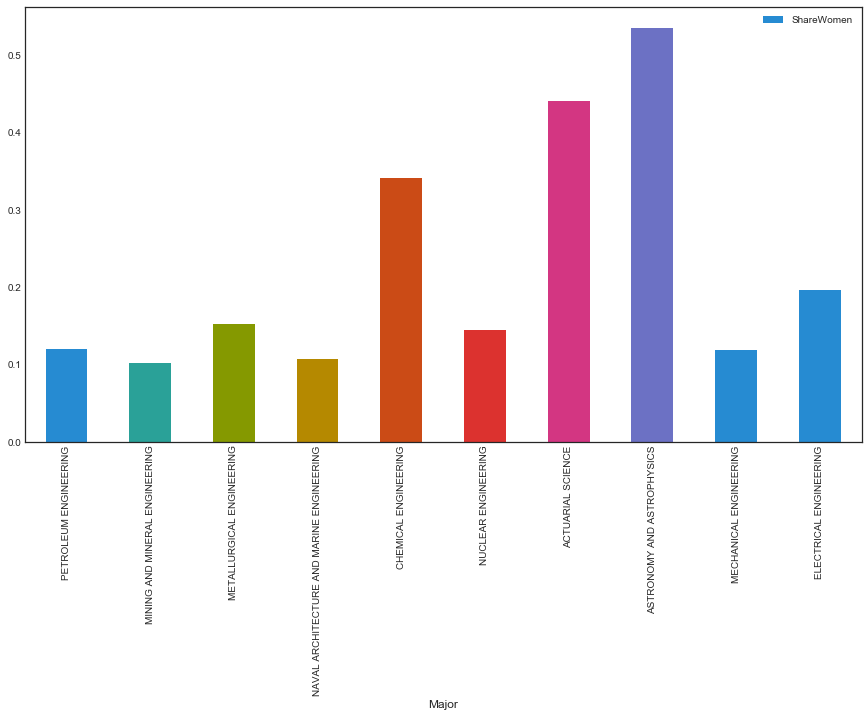

In [71]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', figsize=(15,8));

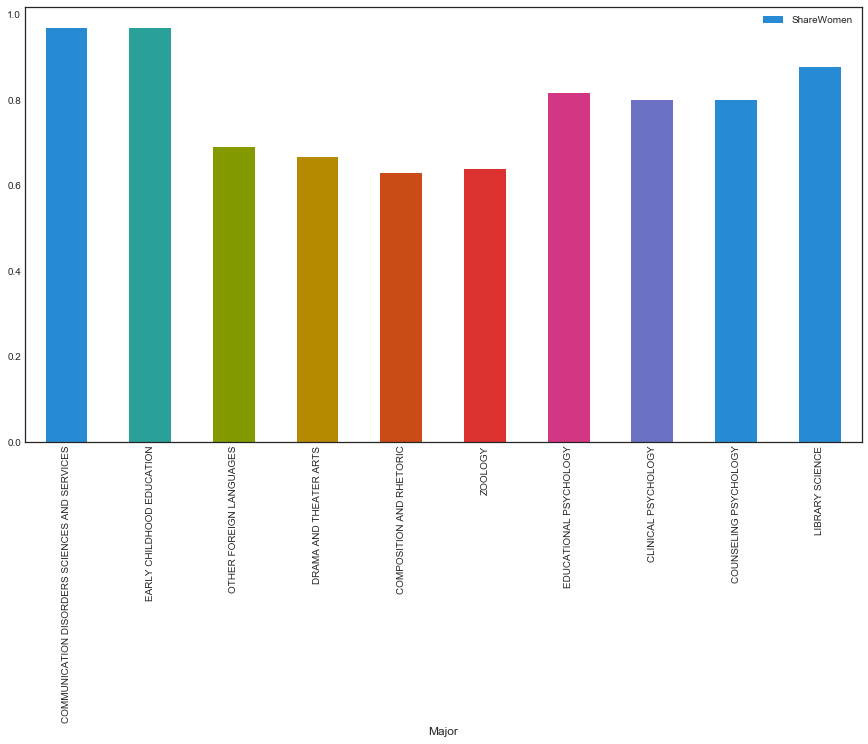

In [72]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', figsize=(15,8));

<b>Above two bar graph shows share of women in different majors for the first and last ten rows of dataframe.

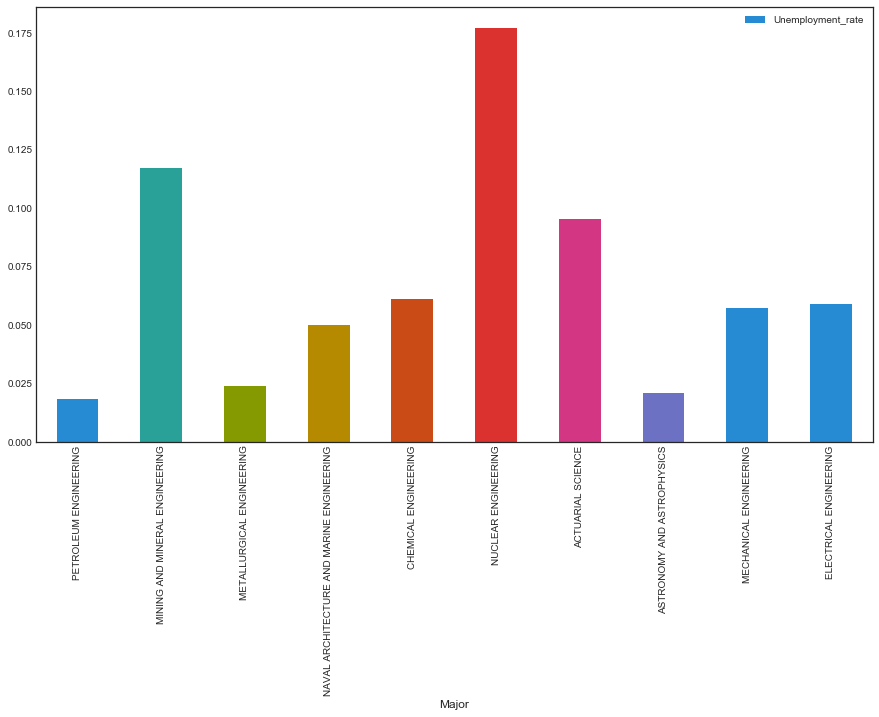

In [80]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', figsize=(15,8));

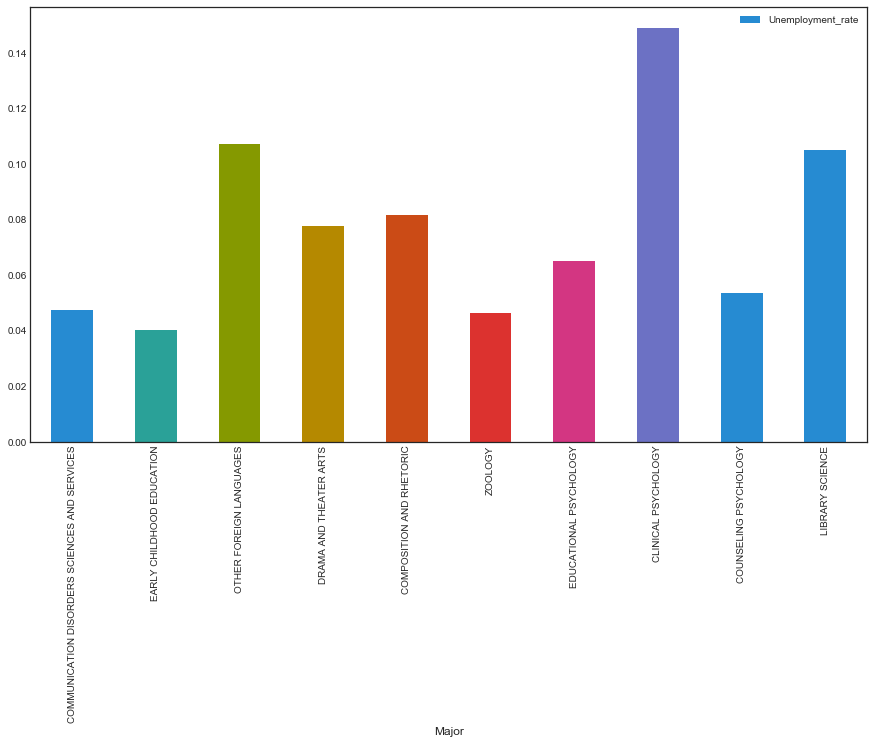

In [74]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', figsize=(15,8));